In [39]:
%matplotlib inline

import numpy as np
import scipy.io as sio
import scipy
import scipy.spatial
from scipy.linalg import norm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA
import numpy.linalg as linal
from sklearn.preprocessing import StandardScaler
from numpy import *

kpca = KernelPCA(kernel = "poly", degree = 1, fit_inverse_transform = True, gamma = 1)

mat_contents = sio.loadmat('./umist_cropped.mat')
facedat = mat_contents['facedat']

people = facedat[0]
people1 = facedat[0][0]  #(112,92,38)
people2 = facedat[0][1]
people1_face1 = facedat[0][0][:,:,0] 
people1_face15 = facedat[0][0][:,:,14]
people2_face2 = facedat[0][1][:,:,1]
people2_face15 = facedat[0][1][:,:,14]

vec_people1_face1 = people1_face1.flatten()
vec_people2_face2 = people2_face2.flatten()
pixels=112*92

In [40]:
def mean_face(faces):
    face_mean  = np.zeros((faces.shape[0],faces.shape[1]))
    for face_num in range(faces.shape[2]):
        face_mean = face_mean + faces[:,:,face_num]
    return face_mean

def mat2vecs(mat_person):
    people_pic_size = mat_person[:][91][1].size
    # print people_pic_size
    mat_people = np.zeros((people_pic_size,pixels))
    for i in range(0,people_pic_size):
        mat_people[i]= mat_person[:,:,i].flatten()# mat_people1 是描述 class的大矩阵
    return mat_people

def ReconginitionVector(people_set):
    # step1: load the face image data ,get the matrix consists of all image
    FaceMat = people_set
    kpca = KernelPCA(kernel = "poly", degree = 1, fit_inverse_transform = True, gamma = 1)
    X_kpca = kpca.fit_transform(FaceMat)
    X_back = kpca.inverse_transform(X_kpca)
    # step2: average the FaceMat
#     avgImg = np.mean(FaceMat,1)
    # step3: calculate the difference of avgimg and all image data(FaceMat)
#     diffTrain = FaceMat-avgImg
    #step4: calculate eigenvector of covariance matrix (because covariance matrix will cause memory error)
#     eigvals,eigVects = linal.eig(mat(diffTrain.T*diffTrain))
#     eigSortIndex = argsort(-eigvals)
#     for i in xrange(shape(FaceMat)[1]):
#         if (eigvals[eigSortIndex[:i]]/eigvals.sum()).sum() >= selecthr:
#             eigSortIndex = eigSortIndex[:i]
#             break
#     covVects = diffTrain * eigVects[:,eigSortIndex] # covVects is the eigenvector of covariance matrix
    # avgImg 是均值图像，covVects是协方差矩阵的特征向量，diffTrain是偏差矩阵
    
    covVects = kpca.alphas_
    return X_kpca, X_back, covVects,kpca

def judgeFace(judgeImg,FaceVector,X_kpca,kpca):
#     diff = judgeImg.T - avgImg
#     weiVec = FaceVector.T* diff
    FaceY_kpca = kpca.transform(judgeImg)
    FaceY_back = kpca.inverse_transform(FaceY_kpca)
    res = 0
    resVal = inf
    # 设置阈值thr1 和 thr2
    thr1 = 1
    thr2 = 1
    d1 = scipy.spatial.distance.euclidean(judgeImg.T, FaceY_back)
    # res >=0 : in dataset, -1: is a face , -2 : not even a face 
    if 1==0: #d1 >= thr1:
        res = -2
    elif 1==1: #d1 < thr1:
        if res == 0 :
            for i in range(40):
                #TrainVec = FaceVector.T*X_kpca[:,i]
                TrainVec = X_kpca[i,:]
                if  (array(FaceY_kpca-TrainVec)**2).sum() < resVal:
                    res =  i
                    resVal = (array(FaceY_kpca-TrainVec)**2).sum()
    return res

In [41]:
people_set = mat(zeros((people.size * 2,pixels)))
for i in range(people.size):
    people_set[2*i,:] = mat(people[i][:,:,8]).flatten()
    people_set[2*i + 1,:] = mat(people[i][:,:,18]).flatten()
X_kpca, X_back, FaceVector,kpca = ReconginitionVector(people_set)
# print judgeFace(mat(people1_face15).flatten(),FaceVector,avgImg,diffTrain)
# print judgeFace(mat(people2_face15).flatten(),FaceVector,avgImg,diffTrain)
# 输出识别每个人时的准确率
count_total = 0.0
pic_num_total = 0
for people_num in range(people.size):
    count = 0.0
    pic_num = people[people_num].shape[2]
    for i in range(pic_num):
        judgeImg = people[people_num][:,:,i]
        judgeNum = judgeFace(mat(judgeImg).flatten(),FaceVector,X_kpca,kpca)
        if judgeNum in ( people_num*2 , people_num*2+1 ) :
            count += 1
            count_total += 1
    pic_num_total += pic_num
    print "%d  \ttotal:%d  \taccuracy: %f %%" % (people_num,pic_num, count / pic_num * 100)
print "total accuracy: %f" % (count_total / pic_num_total)

0  	total:38  	accuracy: 57.894737 %
1  	total:35  	accuracy: 62.857143 %
2  	total:26  	accuracy: 84.615385 %
3  	total:24  	accuracy: 79.166667 %
4  	total:26  	accuracy: 76.923077 %
5  	total:23  	accuracy: 82.608696 %
6  	total:19  	accuracy: 78.947368 %
7  	total:22  	accuracy: 100.000000 %
8  	total:20  	accuracy: 100.000000 %
9  	total:32  	accuracy: 65.625000 %
10  	total:34  	accuracy: 82.352941 %
11  	total:34  	accuracy: 82.352941 %
12  	total:26  	accuracy: 100.000000 %
13  	total:30  	accuracy: 56.666667 %
14  	total:19  	accuracy: 47.368421 %
15  	total:26  	accuracy: 53.846154 %
16  	total:26  	accuracy: 84.615385 %
17  	total:33  	accuracy: 72.727273 %
18  	total:48  	accuracy: 64.583333 %
19  	total:34  	accuracy: 100.000000 %
total accuracy: 0.756522


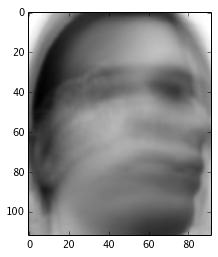

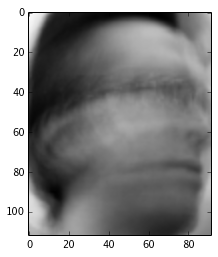

In [42]:
# 计算平均脸
for people in [people1,people2]:
    figures = plt.figure()
    people_mean = mean_face(people)
    img = people_mean
    plt.imshow(img,cmap='gray')

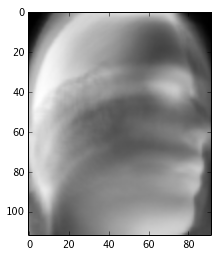

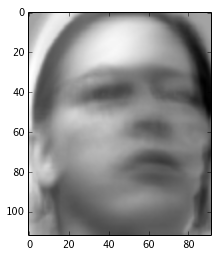

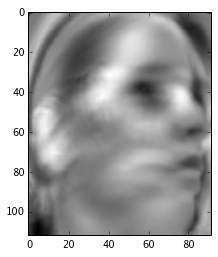

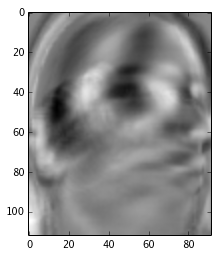

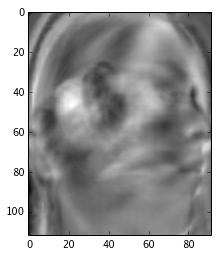

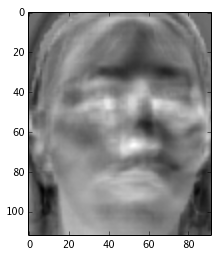

In [43]:
# 样本主成分分析
people1_T = mat2vecs(people1).T
pca = PCA(n_components=6, copy=True, whiten=False)
pc_mat = pca.fit_transform(people1_T).T
for i in range(6):
    figures = plt.figure()
    img = pc_mat[i].reshape((112,92))
    plt.imshow(img,cmap='gray')

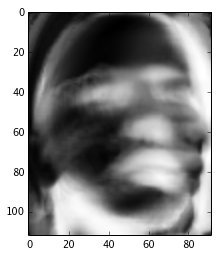

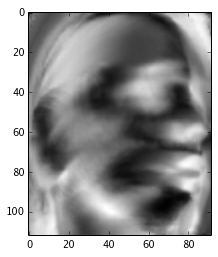

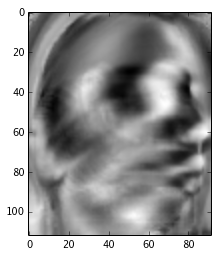

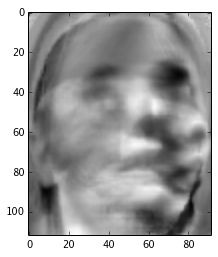

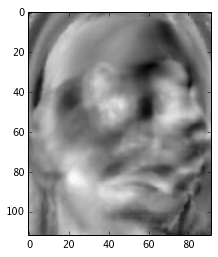

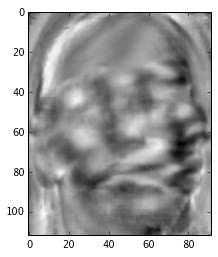

In [44]:
# 标准化样本的主成分分析
X = mat2vecs(people1) # X.shape = (38,10304)
scaler = StandardScaler().fit(X)
X_standar = scaler.transform(X)
pca = PCA(n_components=6)
pca.fit(X_standar.T)
principles = pca.transform(X_standar.T)
principlesT = principles.T #principlesT is (6,112*92)

for i in range(6):
    figures = plt.figure()
    img = principlesT[i].reshape(112,92) 
    plt.imshow(img,cmap='gray') # PCA 6